In [1]:
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Path1ToLocal = "heart_2020_cleaned.csv"
Path1ToKaggle = "/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv"

Path2ToLocal = "glass.csv"
Path2ToKaggle = "/kaggle/input/glass/glass.csv"

Path1 = Path1ToLocal if os.path.exists(Path1ToLocal) else Path1ToKaggle
Path2 = Path2ToLocal if os.path.exists(Path2ToLocal) else Path2ToKaggle

In [3]:
data1 = pd.read_csv(Path1)
data1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
data1.Sex = data1.Sex.map({'Male': 1, 'Female': 0})
data1.AgeCategory = data1.AgeCategory.map({'18-24': 1, '40-44': 2, '45-49': 3, '50-54': 4, '55-59': 5, '60-64': 6, '65-69': 7, '70-74': 8, '75-79': 9, '80 or older': 10, })
data1 = pd.get_dummies(data1, columns=['Race'])
data1.Diabetic = data1.Diabetic.map({'Yes': 1, 'Yes (during pregnancy)': 1, 'No': 0, 'No, borderline diabetes': 0, })
data1.GenHealth = data1.GenHealth.map({'Excellent': 5, 'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1, })
data1.DiffWalking = data1.DiffWalking.map({'Yes': 1, 'No': 0, })
data1.SkinCancer = data1.SkinCancer.map({'Yes': 1, 'No': 0, })
data1.HeartDisease = data1.HeartDisease.map({'Yes': 1, 'No': 0, })
data1.Smoking = data1.Smoking.map({'Yes': 1, 'No': 0, })
data1.AlcoholDrinking = data1.AlcoholDrinking.map({'Yes': 1, 'No': 0, })
data1.Stroke = data1.Stroke.map({'Yes': 1, 'No': 0})
data1.PhysicalActivity = data1.PhysicalActivity.map({'Yes': 1, 'No': 0})
data1.Asthma = data1.Asthma.map({'Yes': 1, 'No': 0, })
data1.KidneyDisease = data1.KidneyDisease.map({'Yes': 1, 'No': 0, })

In [5]:
data1.isnull().sum()

HeartDisease                               0
BMI                                        0
Smoking                                    0
AlcoholDrinking                            0
Stroke                                     0
PhysicalHealth                             0
MentalHealth                               0
DiffWalking                                0
Sex                                        0
AgeCategory                            56258
Diabetic                                   0
PhysicalActivity                           0
GenHealth                                  0
SleepTime                                  0
Asthma                                     0
KidneyDisease                              0
SkinCancer                                 0
Race_American Indian/Alaskan Native        0
Race_Asian                                 0
Race_Black                                 0
Race_Hispanic                              0
Race_Other                                 0
Race_White

In [6]:
data1 = data1.astype(np.float32)

In [7]:
data1.dropna(inplace=True)

In [8]:
y = data1['HeartDisease']

In [9]:
data1 = data1.drop(columns=['HeartDisease'])

<Axes: >

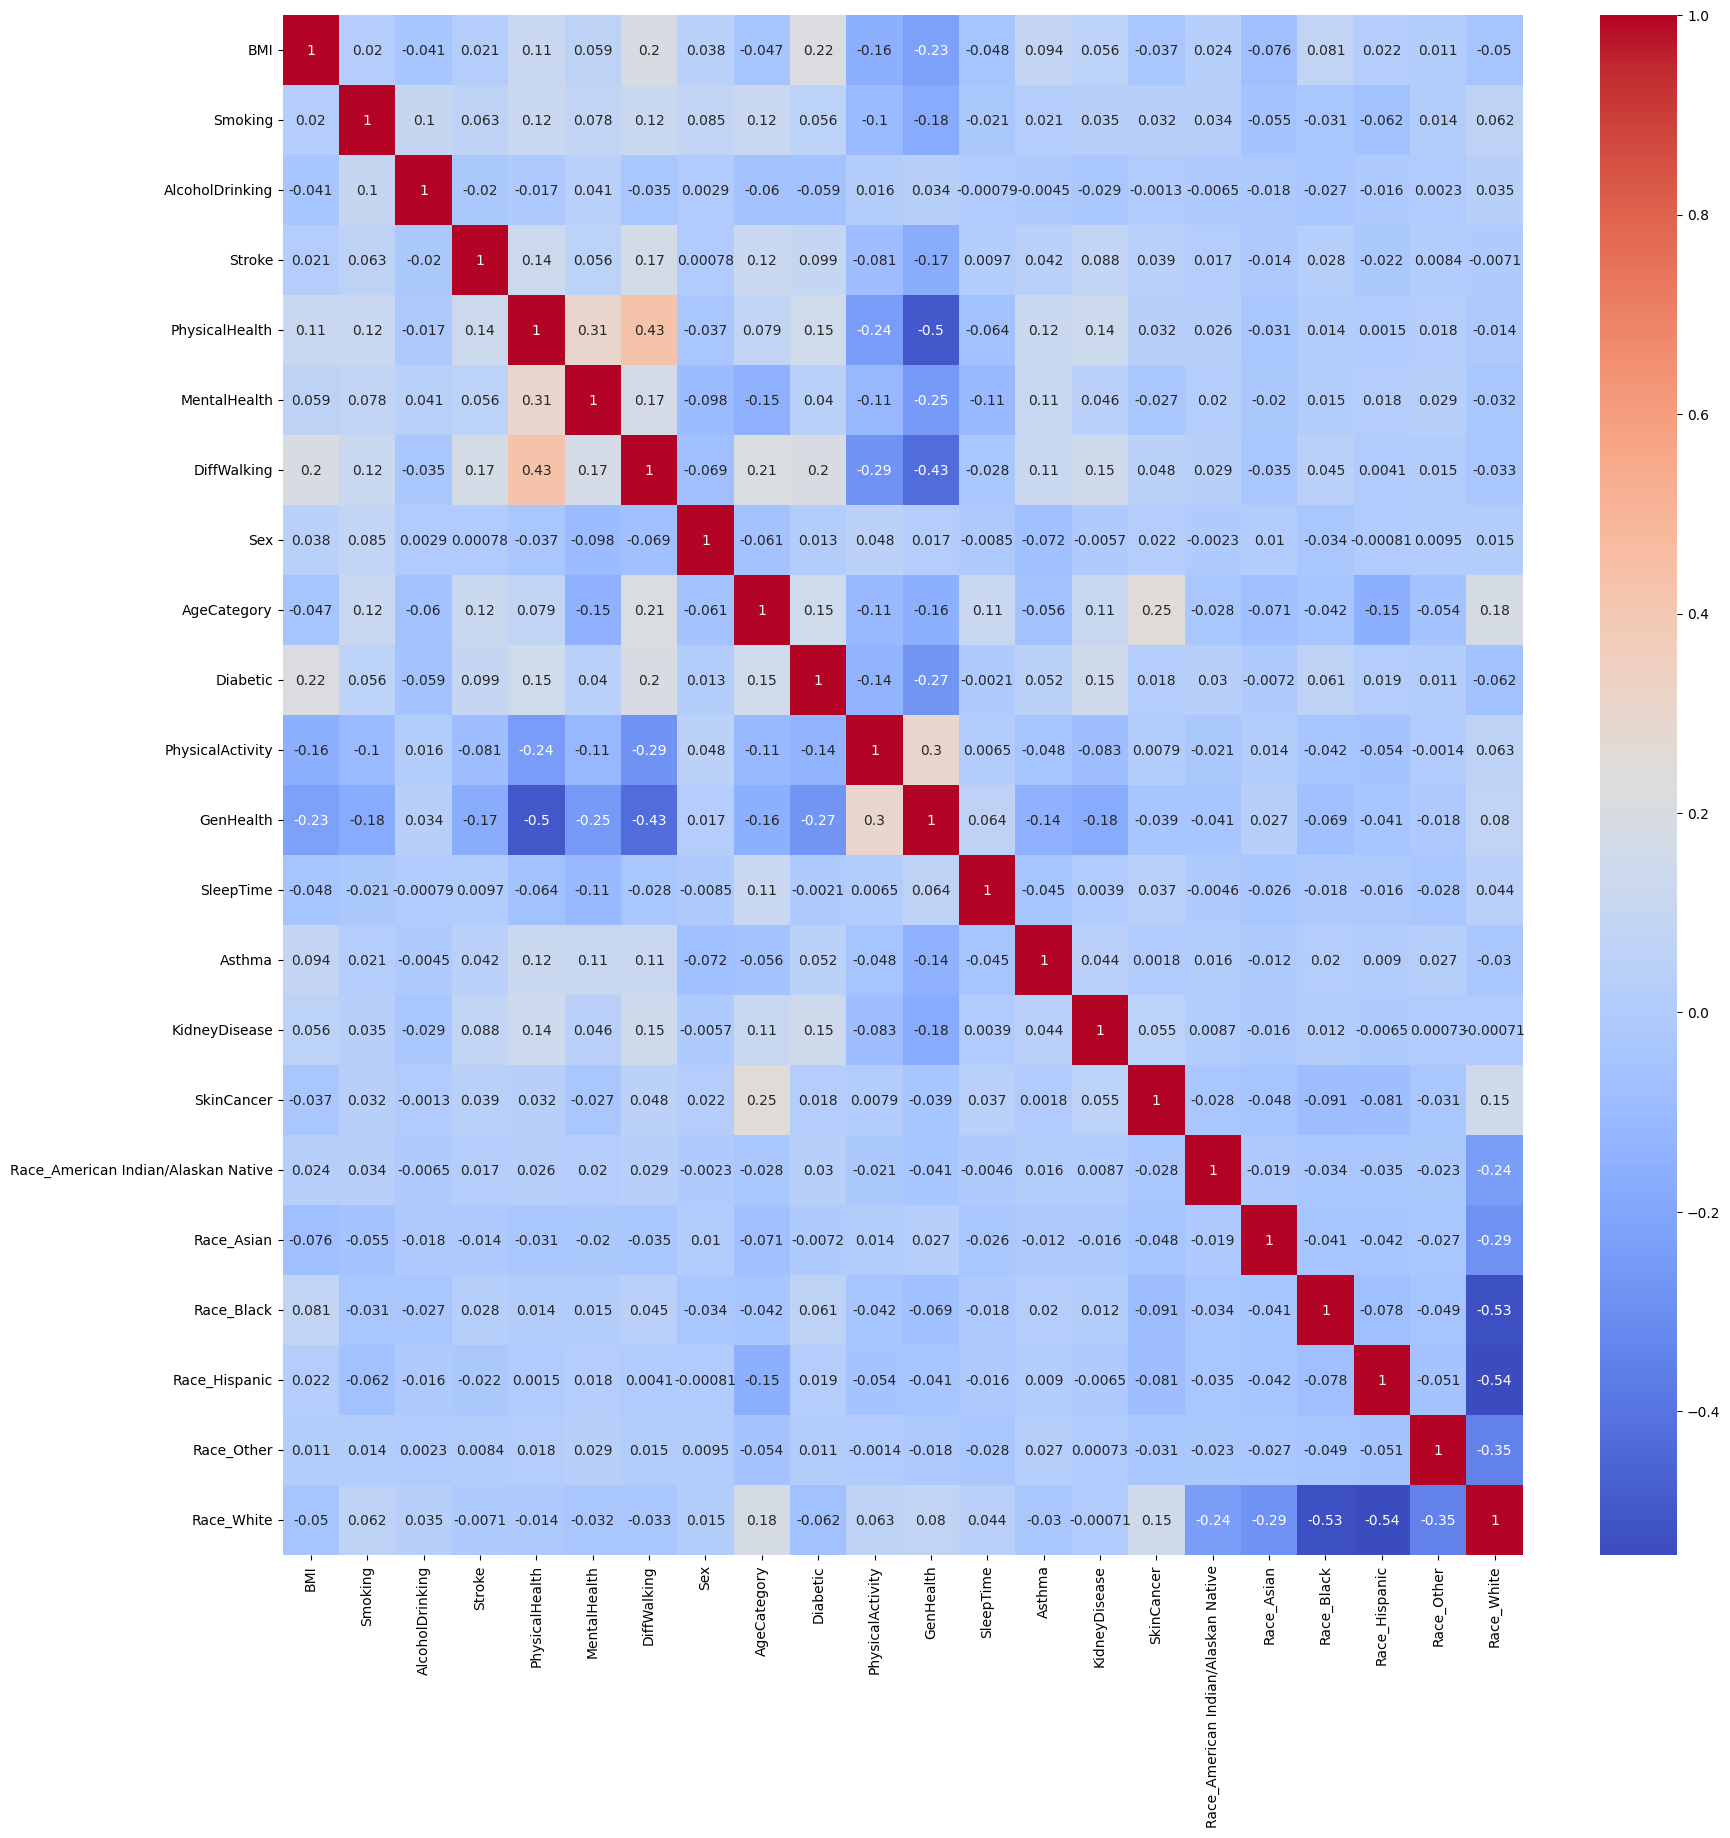

In [10]:
# check the correlation between features
plt.figure(figsize=(20, 20))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')

In [11]:
data1 = np.array(data1)
data1

array([[16.6 ,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [26.58,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [27.41,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [24.24,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [12]:
scaler = MinMaxScaler()
X_centered1 = scaler.fit_transform(data1)

# Applying Fuzzy C-Means Clustering

In [13]:
def fuzzy_c_means(data, num_clusters, fuzziness, max_iters=10, tol=1e-10):
    # Step 1: Initialize membership matrix
    membership_matrix = np.random.rand(data.shape[0], num_clusters)
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)

    for _ in range(max_iters):
        # Step 2: Compute centroids
        centroids = np.zeros((num_clusters, data.shape[1]))
        denominator = np.zeros((num_clusters, 1))
        for i in range(data.shape[0]):
            for j in range(num_clusters):
                centroids[j] += (membership_matrix[i, j] ** fuzziness) * data[i]
                denominator[j] += membership_matrix[i, j] ** fuzziness
        centroids /= denominator  # A / B
        # Step 3: Calculate Euclidean distance
        distances = np.zeros((data.shape[0], num_clusters))
        for i in range(data.shape[0]):
            for j in range(num_clusters):
                distance_ij = np.sqrt(np.sum((data[i] - centroids[j]) ** 2))
                distances[i, j] = distance_ij

                # Step 4: Update membership matrix
        updated_membership_matrix = np.zeros_like(membership_matrix)
        for i in range(data.shape[0]):
            for j in range(num_clusters):
                if distances[i, j] > 0:
                    updated_membership_matrix[i, j] = 1 / np.sum((distances[i, :] / distances[i, j]) ** (2 / (fuzziness - 1)))
                else:
                    updated_membership_matrix[i, j] = 1
                    # Step 5: Check convergence 
        if np.linalg.norm(updated_membership_matrix - membership_matrix) < tol:
            break
        membership_matrix = updated_membership_matrix
        # Print intermediate results
    return membership_matrix, centroids


# Vectorization

In [14]:
def vectorized_fuzzy_c_means(data, num_clusters, fuzziness, max_iters=100, tol=1e-4):
    # Step 1: Initialize membership matrix
    membership_matrix = np.random.rand(data.shape[0], num_clusters)
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)

    for _ in range(max_iters):
        # Step 2: Compute centroids
        centroids = np.dot(membership_matrix.T ** fuzziness, data) / (np.sum(membership_matrix ** fuzziness, axis=0, keepdims=True)).T

        # Step 3: Calculate Euclidean distance
        distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)

        # Step 4: Update membership matrix
        updated_membership_matrix = 1 / np.sum((distances[:, :, np.newaxis] / distances[:, np.newaxis, :]) ** (2 / (fuzziness - 1)), axis=2)

        # Step 5: Check convergence
        if np.linalg.norm(updated_membership_matrix - membership_matrix) < tol:
            break
        membership_matrix = updated_membership_matrix
    return membership_matrix, centroids

In [15]:
# # Define the data
# data = np.array([[1, 2], [2, 3], [9, 4], [10, 1]])

In [16]:
num_clusters = 2
fuzziness = 2
membership_matrix, centroids = fuzzy_c_means(data1, num_clusters, fuzziness)

In [17]:
# Final Membership Matrix:
membership_matrix

array([[0.50991019, 0.49008981],
       [0.45731139, 0.54268861],
       [0.51814648, 0.48185352],
       ...,
       [0.49712746, 0.50287254],
       [0.43165298, 0.56834702],
       [0.50043521, 0.49956479]])

In [18]:
# Final Centroids:
centroids

array([[2.81422799e+01, 4.17616373e-01, 6.35644595e-02, 4.24773856e-02,
        3.24337958e+00, 3.20582837e+00, 1.50469245e-01, 4.73153371e-01,
        5.73500633e+00, 1.50748164e-01, 7.70643689e-01, 3.58131860e+00,
        7.15007875e+00, 1.25353821e-01, 4.08078804e-02, 1.11674090e-01,
        1.51515169e-02, 2.17554104e-02, 6.87763529e-02, 7.30352816e-02,
        3.05766039e-02, 7.90704834e-01],
       [2.85140582e+01, 4.24749859e-01, 6.39683032e-02, 4.61651289e-02,
        4.12195875e+00, 4.02419156e+00, 1.73206282e-01, 4.61902357e-01,
        5.67103277e+00, 1.60856747e-01, 7.53144973e-01, 3.49749687e+00,
        7.12658242e+00, 1.35320396e-01, 4.47279485e-02, 1.10733782e-01,
        1.59654795e-02, 2.10531800e-02, 7.14263188e-02, 7.48082149e-02,
        3.17775100e-02, 7.84969297e-01]])

In [19]:
membership_matrix.shape, centroids.shape

((263537, 2), (2, 22))

# Applying PCA from Scratch

In [20]:
def manual_covariance_matrix(data):
    X_mean = np.mean(data, axis=0)
    x_centered = (data - X_mean)
    num_samples = data.shape[0]
    num_features = data.shape[1]

    covarianceMatrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            covarianceMatrix[i, j] = np.sum((data[:, i] - X_mean[i]) * (data[:, j] - X_mean[j])) / (num_samples - 1)

    return covarianceMatrix, x_centered

In [21]:
covariance_matrix = np.dot(X_centered1.T, X_centered1) / len(X_centered1)

In [22]:
X_centered1.shape

(263537, 22)

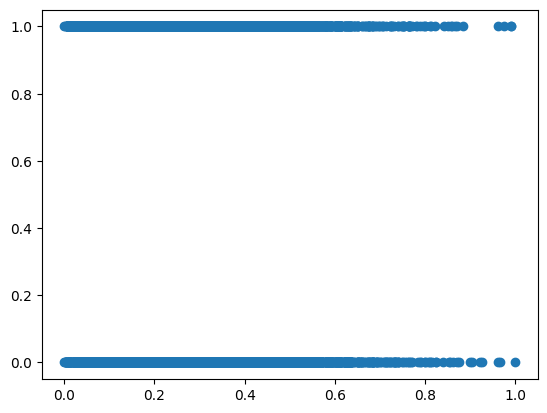

In [23]:
plt.scatter(X_centered1[:, 0], X_centered1[:, 1])

In [24]:
def calculate_eigenvalues_and_eigenvectors(A, tol=1e-10, max_iter=1000000):
    if A.ndim != 2 or A.shape[0] != A.shape[1]: raise ValueError("Matrix A must be square.")
    lambdaMax = 0
    # Initialize random vector
    v = np.ones(A.shape[0])
    for _ in range(max_iter):
        # Update vector
        v = A @ v
        # Normalize
        v_norm = np.linalg.norm(v)
        v /= v_norm
        # Calculate eigenvalue
        lambda_new = np.dot(A @ v, v)
        # Check convergence
        if abs(lambda_new - lambdaMax) < tol: break
        # Update dominant eigenvalue
        lambdaMax = lambda_new
    return lambdaMax, v

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues.max()

2.667960329118082

In [26]:
eigenvectors[eigenvalues.argmax()]

array([ 0.11610815,  0.0304841 ,  0.00693525, -0.03859457,  0.06663776,
        0.0100793 , -0.01200473,  0.01218128,  0.07632484, -0.32326592,
       -0.73026856,  0.56709939, -0.03696965, -0.04895696, -0.04344378,
       -0.07217683,  0.00645401,  0.03499435, -0.03914597, -0.00535935,
       -0.01173814, -0.01309638])

In [27]:
# Normalize eigenvectors
#normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
normalized_eigenvectors = eigenvectors / np.sqrt(np.sum(eigenvectors ** 2, axis=0))

# Construct matrix Q
Q = normalized_eigenvectors

# Print the resulting matrix Q
print(f"Matrix Q:\n{Q.shape}")

Matrix Q:
(22, 22)


In [28]:
def transform_data(F, Q, num_components):
    return F @ Q[:, :num_components]

In [29]:
def inverse_transform(x_transformed, Q, num_components):
    return x_transformed @ Q[:, :num_components].T + np.mean(x_transformed, axis=0)

In [30]:
X_transformed = transform_data(X_centered1, Q, X_centered1.shape[1])

In [31]:
X_transformed.shape

(263537, 22)

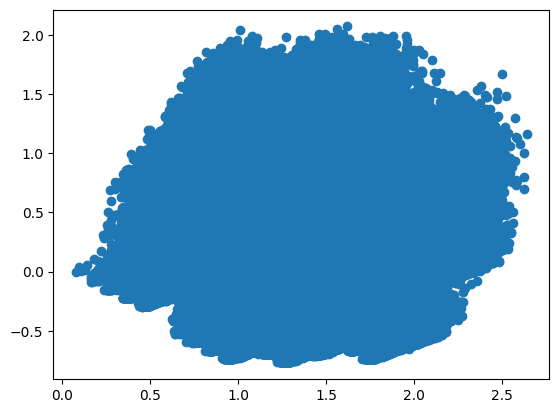

In [32]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [33]:
X_reconstructed = inverse_transform(X_transformed, Q, X_transformed.shape[1])

In [34]:
X_reconstructed.shape

(263537, 22)

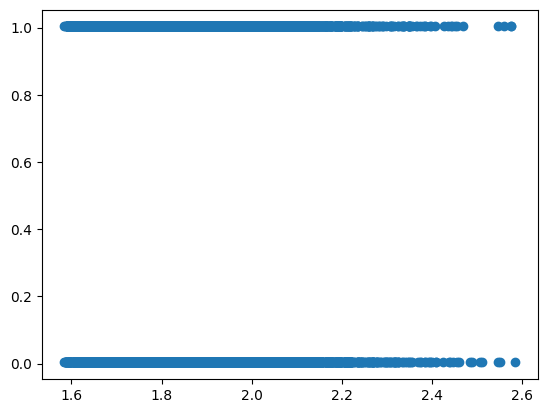

In [35]:
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1])

In [36]:
k_values = range(1, data1.shape[1])

# Initialize variables for tracking the best result
best_reconstruction_error = np.inf
best_Q_matrix = None
best_k = None

# Experiment with different numbers of retained components
for k in k_values:
    # Select the top 'k' normalized eigenvectors
    selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]
    F_prime1 = np.dot(selected_eigenvectors_Q_matrix.T, X_centered1.T).T

    # Compute the inverse of Q (Q^-1)
    Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

    reconstructed_F = np.dot(Q_inverse, F_prime1.T) + np.mean(X_centered1, axis=1, keepdims=True).T
    reconstructed_F = reconstructed_F.T
    # Compute the reconstruction error
    reconstruction_error = np.linalg.norm(X_centered1 - reconstructed_F, 'fro')

    # Update the best result if needed
    if reconstruction_error < best_reconstruction_error:
        best_reconstruction_error = reconstruction_error
        best_Q_matrix = selected_eigenvectors_Q_matrix
        best_k = k
        print(f'k:{k}, reconstruction_error:{reconstruction_error}')

# Report the best Q matrix, best k, and reconstruction error
print("Best Q matrix (for the best k={0}):".format(best_k))
#print(best_Q_matrix)

print("\nReconstruction Error with the Best Q matrix:")
print(best_reconstruction_error)

k:1, reconstruction_error:890.5711994984794
k:2, reconstruction_error:852.3659631086578
k:3, reconstruction_error:813.7002776054452
k:4, reconstruction_error:782.9562242595866
k:5, reconstruction_error:759.8677565633001
k:6, reconstruction_error:738.717903322735
k:7, reconstruction_error:719.5297311814057
k:8, reconstruction_error:701.9207540716313
k:9, reconstruction_error:684.5731571526329
k:10, reconstruction_error:684.2095316503173
k:11, reconstruction_error:683.3304045530226
k:12, reconstruction_error:681.5915451902652
k:13, reconstruction_error:667.7464321077344
k:14, reconstruction_error:655.5573948321119
k:15, reconstruction_error:652.0965324993161
k:16, reconstruction_error:647.1170445150606
k:17, reconstruction_error:634.9515728157346
k:18, reconstruction_error:623.6005746298518
k:19, reconstruction_error:614.5830384061504
k:20, reconstruction_error:606.5794146442092
k:21, reconstruction_error:598.3135002928709
Best Q matrix (for the best k=21):

Reconstruction Error with the

In [37]:
best_Q_matrix.shape

(22, 21)

In [38]:
# Specify the number of components to retain
k = 21  # Set the desired number of components here
# Select the top 'k' normalized eigenvectors
selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]
# Step 3: Compute the transformed matrix Q^T * F_c
F_prime1 = np.dot(selected_eigenvectors_Q_matrix.T, X_centered1.T).T
# F_prime now contains the transformed data

In [39]:
F_prime1.shape

(263537, 21)

In [40]:
Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

# Step 2: Reconstruct the original matrix F
reconstructed_F = np.dot(Q_inverse, F_prime1.T) + np.mean(X_centered1, axis=1, keepdims=True).T
reconstructed_F = reconstructed_F.T
# reconstructed_F now contains the reconstructed original matrix

In [41]:
Q_inverse.shape

(22, 21)

In [42]:
reconstructed_F.shape

(263537, 22)

# Fuzzy C-Means Clustering after Applying PCA with Best Q_matrix

In [43]:
num_clusters = 2
fuzziness = 2
membership_matrix, centroids = fuzzy_c_means(F_prime1, num_clusters, fuzziness)

In [44]:
# Final Membership Matrix:
membership_matrix

array([[0.5000036 , 0.4999964 ],
       [0.49997061, 0.50002939],
       [0.50001912, 0.49998088],
       ...,
       [0.50001874, 0.49998126],
       [0.49997873, 0.50002127],
       [0.49998151, 0.50001849]])

In [45]:
# Final Centroids:
centroids

array([[ 1.58407469e+00,  3.21808353e-03,  1.83280514e-02,
        -1.15269162e-02,  4.33305443e-02,  1.64357662e-03,
         8.35022093e-03,  1.33944695e-03,  3.39907225e-02,
         3.80486298e-03,  1.57047180e-03,  1.35046811e-02,
        -1.50743404e-02, -1.55766216e-02, -3.27409100e-03,
        -2.16604947e-03, -4.05865540e-03,  3.97472478e-03,
        -5.51058573e-03, -1.43813526e-04, -1.36431033e-03],
       [ 1.58411183e+00,  3.31277108e-03,  1.82278263e-02,
        -1.15048143e-02,  4.33144444e-02,  1.64408600e-03,
         8.34746823e-03,  1.33003671e-03,  3.39818696e-02,
         3.80399698e-03,  1.56976925e-03,  1.35024677e-02,
        -1.50711836e-02, -1.55735543e-02, -3.27429377e-03,
        -2.16489806e-03, -4.05674521e-03,  3.97390298e-03,
        -5.50801866e-03, -1.44128041e-04, -1.36352666e-03]])

In [46]:
centroids.shape

(2, 21)

In [47]:
membership_matrix.shape

(263537, 2)

# data2

In [48]:
data2 = pd.read_csv(Path2)
data2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [49]:
data2 = data2.drop(columns=['Type'])

In [50]:
data2.dropna(inplace=True)

<Axes: >

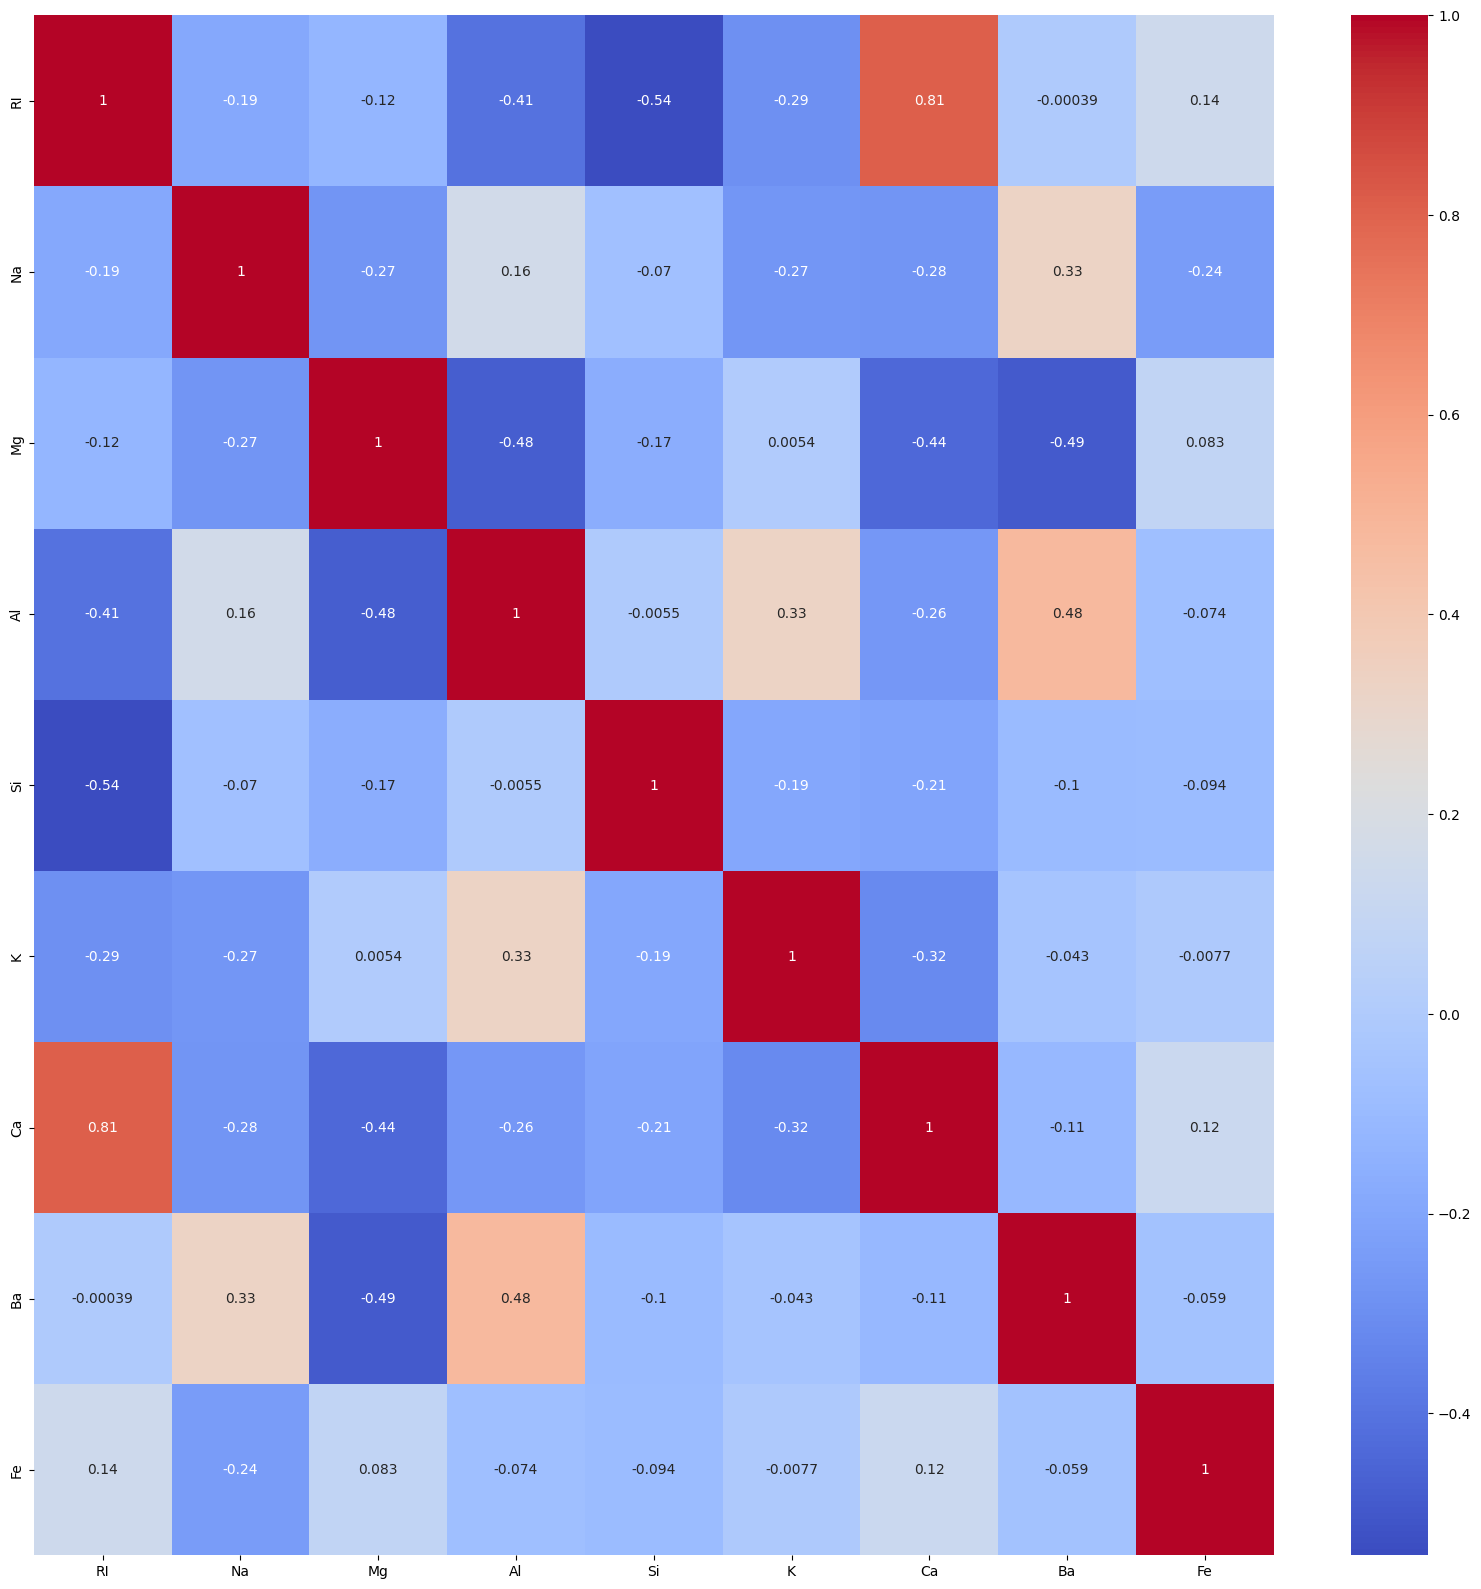

In [51]:
# check the correlation between features
plt.figure(figsize=(20, 20))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')

In [52]:
data2.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [53]:
data2.shape

(214, 9)

In [54]:
data2 = data2.astype(np.float32)

In [55]:
data2 = np.array(data2)

In [56]:
scaler = MinMaxScaler()
X_centered2 = scaler.fit_transform(data2)

In [57]:
num_clusters = 7
fuzziness = 2
membership_matrix, centroids = fuzzy_c_means(data2, num_clusters, fuzziness)

In [58]:
# Final Membership Matrix:
membership_matrix

array([[0.03497299, 0.03497279, 0.2866997 , ..., 0.03497196, 0.03501853,
        0.28670031],
       [0.02188619, 0.02188586, 0.30416612, ..., 0.02188847, 0.02181185,
        0.30416641],
       [0.02002928, 0.02002904, 0.30664066, ..., 0.02003181, 0.01995758,
        0.30664087],
       ...,
       [0.21059292, 0.21059299, 0.05257856, ..., 0.21059523, 0.21041208,
        0.05257819],
       [0.21078909, 0.21078916, 0.05231676, ..., 0.21079136, 0.21060997,
        0.05231637],
       [0.21483843, 0.21483853, 0.04691783, ..., 0.21484047, 0.21466269,
        0.04691747]])

In [59]:
# Final Centroids:
centroids

array([[1.51798239e+00, 1.32412918e+01, 3.38878185e+00, 1.33471316e+00,
        7.26478366e+01, 5.38349564e-01, 8.60200887e+00, 4.78722890e-02,
        6.10355710e-02],
       [1.51798238e+00, 1.32412975e+01, 3.38878474e+00, 1.33471325e+00,
        7.26478346e+01, 5.38348043e-01, 8.60200375e+00, 4.78727056e-02,
        6.10353455e-02],
       [1.51886360e+00, 1.39502905e+01, 4.38312583e-01, 1.86108694e+00,
        7.28523846e+01, 2.87191883e-01, 9.92065306e+00, 5.56240871e-01,
        4.10954820e-02],
       [1.51886593e+00, 1.39497302e+01, 4.38717673e-01, 1.86075502e+00,
        7.28520751e+01, 2.87181445e-01, 9.92182932e+00, 5.55825879e-01,
        4.11228536e-02],
       [1.51798253e+00, 1.32412770e+01, 3.38878981e+00, 1.33469578e+00,
        7.26478188e+01, 5.38340787e-01, 8.60207018e+00, 4.78619183e-02,
        6.10369341e-02],
       [1.51797868e+00, 1.32425016e+01, 3.38762233e+00, 1.33532351e+00,
        7.26482267e+01, 5.38431391e-01, 8.60035755e+00, 4.84527326e-02,
        6.0

In [60]:
membership_matrix.shape, centroids.shape

((214, 7), (7, 9))

# Applying PCA from Scratch

In [61]:
covariance_matrix = np.dot(X_centered2.T, X_centered2) / len(X_centered2)

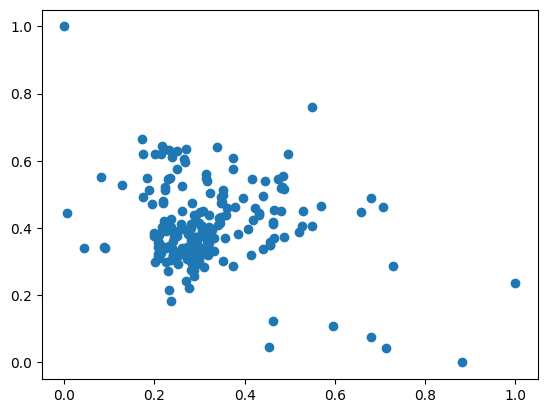

In [62]:
plt.scatter(X_centered2[:, 0], X_centered2[:, 1])

In [63]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues.max()

1.1499658

In [64]:
eigenvectors[eigenvalues.argmax()]

array([-0.29158032, -0.13247676, -0.5209345 ,  0.2595823 , -0.29362926,
        0.6650884 ,  0.10699563, -0.10881092, -0.0826223 ], dtype=float32)

In [65]:
# Normalize eigenvectors
#normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
normalized_eigenvectors = eigenvectors / np.sqrt(np.sum(eigenvectors ** 2, axis=0))

# Construct matrix Q
Q = normalized_eigenvectors

# Print the resulting matrix Q
print(f"Matrix Q:\n{Q.shape}")

Matrix Q:
(9, 9)


In [66]:
X_transformed = transform_data(X_centered2, Q, X_centered2.shape[1])

In [67]:
X_transformed.shape

(214, 9)

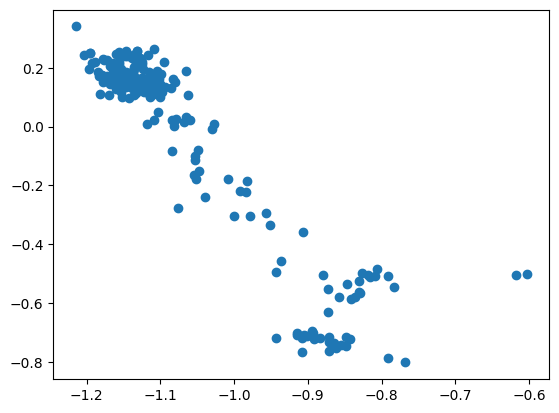

In [68]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [69]:
X_reconstructed = inverse_transform(X_transformed, Q, X_transformed.shape[1])

In [70]:
X_reconstructed.shape

(214, 9)

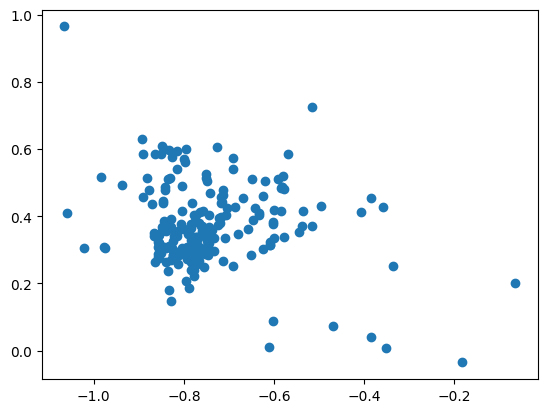

In [71]:
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1])

In [72]:
k_values = range(1, data2.shape[1])

# Initialize variables for tracking the best result
best_reconstruction_error = np.inf
best_Q_matrix = None
best_k = None

# Experiment with different numbers of retained components
for k in k_values:
    # Select the top 'k' normalized eigenvectors
    selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]
    F_prime2 = np.dot(selected_eigenvectors_Q_matrix.T, X_centered2.T).T

    # Compute the inverse of Q (Q^-1)
    Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

    reconstructed_F = np.dot(Q_inverse, F_prime2.T) + np.mean(X_centered2, axis=1, keepdims=True).T
    reconstructed_F = reconstructed_F.T
    # Compute the reconstruction error
    reconstruction_error = np.linalg.norm(X_centered2 - reconstructed_F, 'fro')

    # Update the best result if needed
    if reconstruction_error < best_reconstruction_error:
        best_reconstruction_error = reconstruction_error
        best_Q_matrix = selected_eigenvectors_Q_matrix
        best_k = k
        print(f'k:{k}, reconstruction_error:{reconstruction_error}')

# Report the best Q matrix, best k, and reconstruction error
print("Best Q matrix (for the best k={0}):".format(best_k))
#print(best_Q_matrix)

print("\nReconstruction Error with the Best Q matrix:")
print(best_reconstruction_error)

k:1, reconstruction_error:15.222224235534668
k:2, reconstruction_error:14.534427642822266
k:3, reconstruction_error:14.187177658081055
k:4, reconstruction_error:13.968324661254883
k:5, reconstruction_error:13.780242919921875
k:6, reconstruction_error:13.773645401000977
k:7, reconstruction_error:13.731341361999512
k:8, reconstruction_error:13.644488334655762
Best Q matrix (for the best k=8):

Reconstruction Error with the Best Q matrix:
13.644488


In [73]:
best_Q_matrix.shape

(9, 8)

In [74]:
# Specify the number of components to retain
k = 8  # Set the desired number of components here

# Select the top 'k' normalized eigenvectors
selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]

# Step 3: Compute the transformed matrix Q^T * F_c
F_prime2 = np.dot(selected_eigenvectors_Q_matrix.T, X_centered2.T).T

In [75]:
F_prime2.shape  # number of samples x reduced festure

(214, 8)

In [76]:
Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

# Step 2: Reconstruct the original matrix F
reconstructed_F = np.dot(Q_inverse, F_prime2.T) + np.mean(X_centered2, axis=1, keepdims=True).T
reconstructed_F = reconstructed_F.T

In [77]:
Q_inverse.shape

(9, 8)

In [78]:
reconstructed_F.shape

(214, 9)

In [79]:
num_clusters = 7
fuzziness = 2
membership_matrix, centroids = fuzzy_c_means(F_prime2, num_clusters, fuzziness)

In [80]:
# Final Membership Matrix:
membership_matrix

array([[0.28603598, 0.03547508, 0.28591239, ..., 0.0354707 , 0.28591023,
        0.03572859],
       [0.31370354, 0.01467714, 0.3137294 , ..., 0.0146729 , 0.31372854,
        0.01482008],
       [0.3071554 , 0.01955407, 0.30724028, ..., 0.0195478 , 0.30724048,
        0.01972062],
       ...,
       [0.03256052, 0.22573927, 0.0326949 , ..., 0.22576225, 0.03269555,
        0.22476685],
       [0.02961689, 0.22792185, 0.02980116, ..., 0.22794378, 0.0298024 ,
        0.22695286],
       [0.0321385 , 0.22603117, 0.03231237, ..., 0.22605278, 0.03231357,
        0.22508175]])

In [81]:
# Final Centroids:
centroids

array([[-8.90982701e-01, -5.58375545e-01,  7.77405446e-03,
         1.00088221e-02,  1.29045404e-02, -1.06611827e-03,
        -6.90890846e-03,  1.78232183e-02],
       [-1.12189435e+00,  1.28747464e-01,  1.56276723e-02,
         8.63001772e-03,  9.71754968e-04, -3.28595169e-04,
         6.11075506e-04, -7.03792002e-03],
       [-8.91082527e-01, -5.58297521e-01,  6.73280046e-03,
         1.05143533e-02,  1.30453814e-02, -1.08101583e-03,
        -7.44150613e-03,  1.82487491e-02],
       [-1.12193212e+00,  1.28837874e-01,  1.56834649e-02,
         8.61438739e-03,  9.92988191e-04, -3.28751249e-04,
         5.96603586e-04, -7.04533178e-03],
       [-1.12191512e+00,  1.28797034e-01,  1.56545255e-02,
         8.62074176e-03,  9.84136627e-04, -3.28659651e-04,
         6.03223660e-04, -7.04171962e-03],
       [-8.91081289e-01, -5.58295854e-01,  6.72516721e-03,
         1.05270197e-02,  1.30437406e-02, -1.08130934e-03,
        -7.44156974e-03,  1.82502420e-02],
       [-1.12108239e+00,  1.267079

In [82]:
membership_matrix.shape, centroids.shape

((214, 7), (7, 8))


# Report for Phase 1
- Input Data is 22 features and 319,795 samples
- The Output of covariance matrix is 22x22 features (We used two different methods to compute the covariance matrix, and we obtained the same results)
- eigenvalues are 22 eigenvalues and eigenvectors are 22x22 features (We used the built-in method and from scratch method to compute the eigenvalues and eigenvectors, and we obtained the same results)
- We created the matrix Q by sorting the normalized eigenvectors in descending order of eigenvalues.
- We tried different numbers of components (k), and the best result is 21. Because the reconstruction error is the lowest.
- Best reconstruction error 1625.209 (From 5171.140 to 1625.209)
- We transformed the original matrix [ F' = Q (F - m)] to the transformed matrix and reconstructed the transformed matrix (inverse) [F = (Q - 1 * F') + m].
- We truncated matrix Q (take some values) from Q, then the new F length is smaller than old (Reduce dimensionality).
- The code iterates over different numbers of retained components (k_values) and reconstructs the data using the selected principal components. The reconstruction error is computed for each iteration.
- Best Results The best results are reported based on the minimum reconstruction error. The optimal number of retained components (best_k), the corresponding Q matrix (best_Q_matrix), and the minimum reconstruction error are printed.
- This report provides insights into the analysis, including the sorted eigenvalues and eigenvectors, the normalization of eigenvectors, and the determination of the best reconstruction using PCA. The output will show the best Q matrix, the optimal number of retained components, and the associated reconstruction error.
---


* # Report for phase 2


* "When employing PCA in conjunction with Fuzzy C-means clustering, it appears that the algorithm converges more efficiently, displaying a notable improvement in convergence quality compared to using the entire (all) dataset. This observation is particularly evident when the dataset is smaller and simpler than our own."



 


* Fuzzy C-mean (FCM): 
* Dividing the data points to set of clusters using membership function between each point in the dataset and all clusters centroids.
* A particular data of the set may be the member of several clusters with different values of membership.
* Input for FCM: Data , C (number of clusters)
* Output for FCM: Mij(Membership matrix) , Cj (cluster centroid) [1 <=j<= C], [1<=i<=n]
  

* steps for Fuzzy C-mean (FCM):
1. Assume the number of clusters to be made C. Such that: 2<=C<=N (N: # of samples)
2. Choose an appropriate level of cluster fuzziness g  Such that: g > 1
3. Initialize the NxC sized membership matrix [M] at random such that: (a) Mij∈ [0.0 ,1.0] and there sum should be 1
4. Compute centroids
5. Calculate the Euclidean distance between each data point i-th and j-th cluster center dij
6. Update fuzzy membership matrix[M] according to dij
7. Repeat until the changes in [M] come out to be less than some pre-specified values.


 






## We used two datasets
### the first one has a low correlation, so the updated membership matrix was converging very slowly (more iterations).
### the second one has a high relative correlation, so the updated membership matrix was converging relatively fast.

Team Member: Abdelrahman Amin (20200311) / Mohamed Hisham (20200483) / Abdelrahman Mostafa (20200827) / Yossef Mohamed (20200669) / Esraa Abdelmoneam (20201015)